In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [2]:
erangel_gen = pd.read_csv('cleaned_gen_match_stats.csv')

In [3]:
erangel_gen['normalized_ranking'] = (erangel_gen['normalized_ranking'] * 100).round(3)
erangel_gen.describe().applymap(lambda x: f"{x:0.3f}")

,game_size,party_size,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,normalized_ranking
count,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000
mean,45.773,2.756,0.410,1132.549,1227.639,102.196,0.683,764.021,49.755
std,23.231,1.216,0.647,1869.061,1198.361,121.626,1.120,563.318,28.682
min,24.000,1.000,0.000,0.000,1.000,0.000,0.000,50.405,0.000
25%,27.000,2.000,0.000,0.000,219.673,0.000,0.000,244.813,25.000
50%,43.000,2.000,0.000,0.000,821.483,72.000,0.000,615.374,51.000
75%,50.000,4.000,1.000,1838.660,1986.821,152.000,1.000,1251.628,75.000
max,96.000,4.000,2.000,14974.475,36748.125,3646.000,35.000,2373.716,98.900


In [4]:
erangel_gen = erangel_gen.sample(n = 2000000) #sample 2 million data points


---

## Multi-Variate Linear Regression

We will utilize Multi-Variate Linear Regression to find the weights of how data affects probability of winning.   

Response Variable : **team_placement**     
Predictor Feature : **game_size, player_kills, player_survive_time, player_dmg, player_dbno, player_dist_walk, player_dist_ride**       
<br>
<br>
Extract the variables and the associated data as a Pandas `DataFrame`.

Intercept of Regression 	: b =  [83.95000335]
Coefficients of Regression 	: a =  [[-2.89371437e-02 -8.10332754e-01 -3.87029791e-02 -1.34986632e-03
   1.15511297e+00 -2.00820984e-03 -5.46724555e-04]]

            Predictors  Coefficients
0            game_size     -0.028937
1         player_kills     -0.810333
2  player_survive_time     -0.038703
3           player_dmg     -0.001350
4          player_dbno      1.155113
5     player_dist_walk     -0.002008
6     player_dist_ride     -0.000547



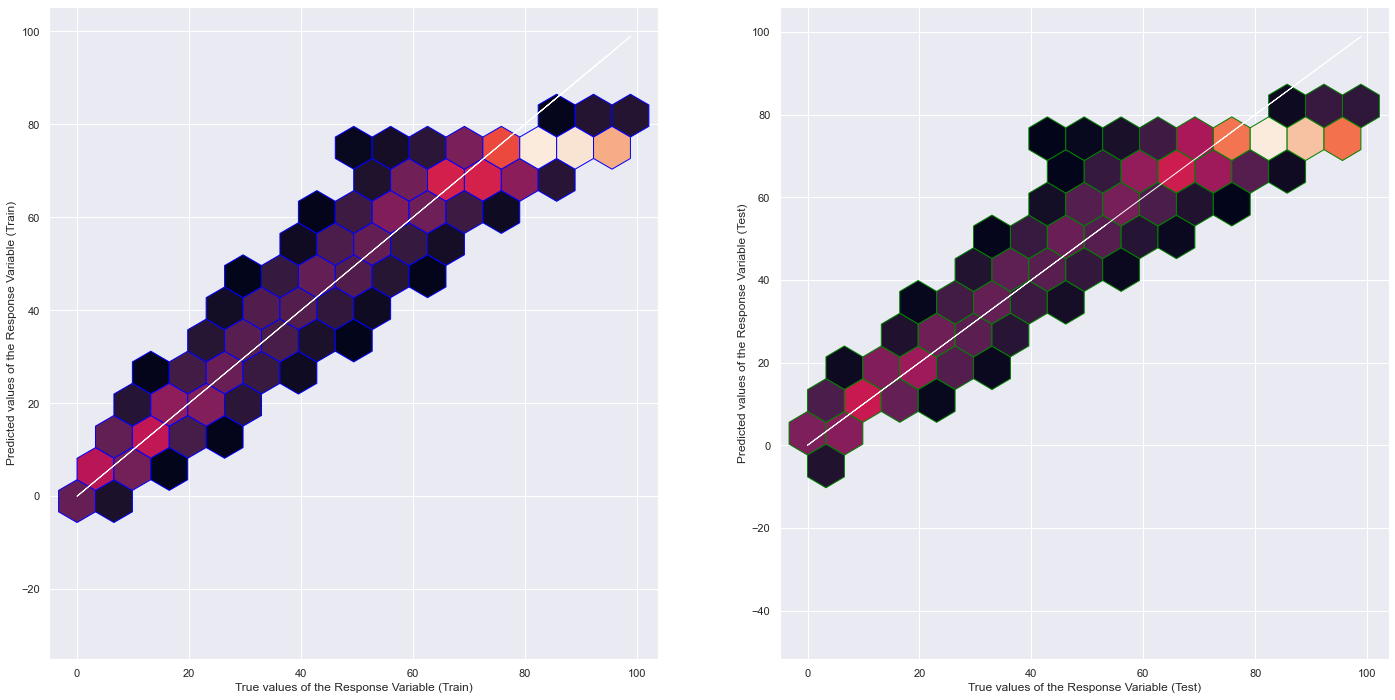

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7469976353788981
Mean Squared Error (MSE) 	: 208.202160172192

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7460144389757388
Mean Squared Error (MSE) 	: 208.76625974555813



In [6]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(erangel_gen["normalized_ranking"])
X = pd.DataFrame(erangel_gen[["game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"]])


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].hexbin(y_train, y_train_pred, gridsize=15, color = "blue", mincnt=5500)
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].hexbin(y_test, y_test_pred, gridsize=15, color = "green", mincnt=2000)
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

<br>

---

### Conclusions of Linear Regression

>We set up the model to have 7 predictors. We can utilize their coefficients to determing how much impact one value will have on a player's winning chances

| Predictor | Coefficient | Unit|  Observation and Thoughts |
| --- | --- | --- | --- |
|`game_size `         |0.0289% | per player|  With a smaller pool of players, it makes sense that a player will have higher chances of winning  <br>~|
|`player_survive_time`| 0.038% |per second| Every minute, a player's chances of winning increases by **2.28%!**<br>~|
|`player_dmg `        |0.0013% |per 1 damage dealt| A single bullet from a AK-47 deals 47 damage. Hitting 30 bullets increases winning chance by **1.833%**<br>~|
|`player_dbno   `     | -15%| per knockdown| Every knockdown reduces a players winning chance by a significant margin <br> ~  |
|`player_dist_walk`   | 0.002% |per meter walked |   Every **km** a player walks, his chance of winning increases by **2%**<br>~|
|`player_dist_ride`   |  0.005%| per distance driven | Every **km** a player drives, his chance of winning increases by **5%**! <br>This is much better than walking |
|`player_kills `      |8.103%| per kill| Wow! In PUBG, there are many strategies players use. <br>One strategy is avoiding fights, and the other is actively hunting people to kill.<br>This data reveals that it is extremely worthwhile to go for kills, as one single kill increases your chance of winning by **8%**|


